# Наименование работы: Анализ оттока клиентов банка

# Наименование Этапа: Декомпозиция
Разбивка задачи проекта на шаги — обязательный этап, который принесёт вам 1 сторипойнт. Составив чёткий план решения задачи и утвердив его с тимлидом, вы избежите лишних доработок и сможете быстрее завершить проект. Выполните декомпозицию в Jupyter Notebook. Используйте Markdown, чтобы лучше оформить и структурировать документ. Тимлид может принять декомпозицию сразу, а может попросить её скорректировать или задать вопросы. Вы получите комментарии тимлида в отдельных ячейках вашего документа в течение 24 часов после отправки.

# Этап 0. Подгружаем библиотеки

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns



# Этап 1. Изучим датасет

In [5]:
try:
    df = pd.read_csv('/datasets/bank_dataset.csv')
      
except:
    df = pd.read_csv('C:/Users/MaCSC LLC/datasets/bank_dataset.csv')
    
display(df.head(5))
df.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB



<div class="alert alert-success">
<b>Комментарий тимлида v2.0:</b>☀️Да, все супер. Еще можно заложить в try ссылку для скачивания файла</div>


In [6]:
print(df.isnull().sum()) 
print(' ') 
print('Полных дубликатов:', df.duplicated().sum())

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64
 
Полных дубликатов: 0


In [7]:
print(df['City'].unique())
print(df['Gender'].unique())
print(df['Age'].max(),df['Age'].min()) 
print(df['Churn'].unique())   

['Ярославль' 'Рыбинск' 'Ростов Великий']
['Ж' 'М']
92 18
[1 0]


# Этап 2. Предобработка данных

In [8]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})
#df['balance'] = df['balance'].fillna(-5)   # еще не рашил, надо ли ставить заглушки или нет
print (df.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')


In [9]:
def propuski(data):
    print(f"{'name':15} {'total_null':5}   {'%_null':5}")
    
    for i in data.columns:
        
        print(f'{i:16} {data[i].isnull().sum():5}        {data[i].isnull().sum()/len(data[i])*100:2.2f}%')
    

#print(df.isnull().sum())

In [10]:
propuski(df)

name            total_null   %_null
user_id              0        0.00%
score                0        0.00%
city                 0        0.00%
gender               0        0.00%
age                  0        0.00%
objects              0        0.00%
balance           3617        36.17%
products             0        0.00%
credit_card          0        0.00%
loyalty              0        0.00%
estimated_salary     0        0.00%
churn                0        0.00%


In [11]:
df.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0


In [12]:
df['gender_to_dell'] = df['gender']
df.loc[df['gender'] == 'М', 'gender'] = 0
df.loc[df['gender'] == 'Ж', 'gender'] = 1


df['town'] = df['city']
df = pd.get_dummies(df, columns=['gender_to_dell'])
df = pd.get_dummies(df, columns=['town'])
df = df.rename(columns={'gender_to_dell_Ж':'female','gender_to_dell_М':'male','town_Ростов Великий':'rostov','town_Рыбинск':'rybinsk','town_Ярославль':'yaroslavl' })

df.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0


# 3. Проведем исследовательский анализ данных

In [13]:
display(df.head(4))

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,15662040,502,Ярославль,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
3,15744090,699,Ярославль,1,39,1,NaN,2,0,0,93826.63,0,1,0,0,0,1


In [14]:
df.query('balance.isna()').groupby('city')['city'].count()

city
Рыбинск      1199
Ярославль    2418
Name: city, dtype: int64

In [15]:
df.groupby('churn')['churn'].count().to_frame()


,churn
churn,
0,7963
1,2037


In [16]:
df.query('balance>0').groupby('city').agg({'city':'count', 'churn':['sum','count']})

city churn      
               count   sum count
city                            
Ростов Великий  2509   814  2509
Рыбинск         1278   250  1278
Ярославль       2596   473  2596

In [17]:
df.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300,0.545700,0.250900,0.247700,0.501400
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.497932,0.433553,0.431698,0.500023
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0


In [19]:
df.loc[df['age'] >= 70, 'category_age'] = 12
df.loc[df['age'] < 70, 'category_age'] = 11  
df.loc[df['age'] < 65, 'category_age'] = 10  
df.loc[df['age'] < 60,  'category_age'] = 9
df.loc[df['age'] < 55, 'category_age'] = 8
df.loc[df['age'] < 50, 'category_age'] = 7
df.loc[df['age'] < 45, 'category_age'] = 6
df.loc[df['age'] < 40, 'category_age'] = 5
df.loc[df['age'] < 35, 'category_age'] = 4
df.loc[df['age'] < 30, 'category_age'] = 3
df.loc[df['age'] < 25, 'category_age'] = 2
df.loc[df['age'] < 20, 'category_age'] = 1

df.loc[df['age'] >70, 'fin_age'] = '70+'
df.loc[df['age'] <=70, 'fin_age'] = '66-70'  
df.loc[df['age'] <= 65, 'fin_age'] = '61-65'  
df.loc[df['age'] <= 60, 'fin_age'] = '56-60'
df.loc[df['age'] <= 55, 'fin_age'] = '51-55'
df.loc[df['age'] <= 50, 'fin_age'] = '46-60'
df.loc[df['age'] <= 45, 'fin_age'] = '41-45'
df.loc[df['age'] <= 40, 'fin_age'] = '36-40'
df.loc[df['age'] <= 35, 'fin_age'] = '31-35'
df.loc[df['age'] <= 30, 'fin_age'] = '26-30'
df.loc[df['age'] <= 25, 'fin_age'] = '21-25'
df.loc[df['age'] <= 20, 'fin_age'] = '20'


df['category_age'] = df['category_age'].astype(int)
temp = df.groupby('fin_age').agg({'age':'count'}).reset_index().rename(columns = {'age':'total'})
df.head(3)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl,category_age,fin_age
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1,6,41-45
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,6,41-45
2,15662040,502,Ярославль,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,6,41-45


In [20]:
df_age = df.copy()  
for age in df['fin_age'].unique():  
    df_age[age] = 0
    df_age.loc[df_age['fin_age'] == age, age] = 1 
    
display (df_age.head(3))

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,...,46-60,26-30,31-35,21-25,56-60,51-55,61-65,20,66-70,70+
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15662040,502,Ярославль,1,42,8,159660.80,3,1,0,...,0,0,0,0,0,0,0,0,0,0


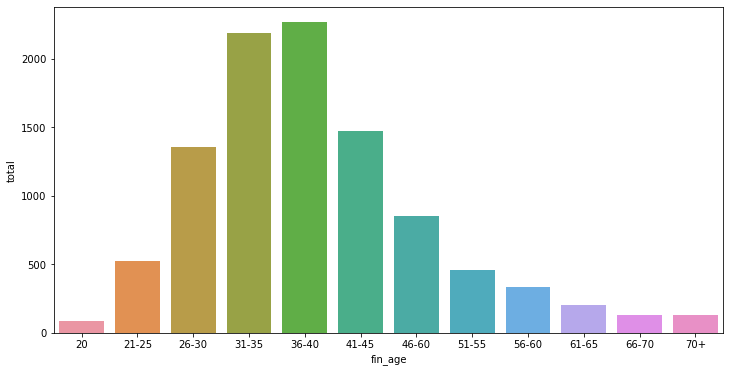

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot (data = temp, x = 'fin_age', y = 'total')
plt.show()
    
    

In [22]:
display(df.head(3))

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl,category_age,fin_age
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1,6,41-45
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,6,41-45
2,15662040,502,Ярославль,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,6,41-45


In [23]:
def my_sity_gender(data, town):
    temp_all = data.query('city == @town')
    temp = temp_all.groupby('gender').agg({'city':'count'}).reset_index().rename(columns = {'city':'total'})
    temp.loc[temp['gender'] == 1, 'gender'] = 'Male'
    temp.loc[temp['gender'] == 0, 'gender'] = 'Female'
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    print(f'Город {town}')
    print('__________________________________________________________________________________________________________________')
    sns.barplot(x='gender', y='total', data=temp)
    plt.title(f'Распределение по гендеру в городе {town.split()[0]}', size = 10)
    plt.xlabel('Пол', size = 8)
    plt.ylabel('Количество клиентов', size = 12)
    
    plt.subplot(1, 3, 2)
    group_category_age = temp_all.groupby('fin_age')['gender'].count().reset_index()
    sns.barplot(x='fin_age', y='gender', data=group_category_age)
    plt.title(f'Распределение по возрастным группам в городе {town.split()[0]}', size = 10)
    plt.xlabel('Возрастные группы', size = 10)
    plt.xticks(rotation=90)
    plt.ylabel('Количество клиентов')

    plt.subplot(1, 3, 3)
    group_prodacts = temp_all.groupby('products')['gender'].count().reset_index()
    sns.barplot(x='products', y='gender', data=group_prodacts)
    plt.title(f'Распределение сумме продуктов в городе {town.split()[0]}', size = 10)
    plt.xlabel('Кoличество продуктов', size = 10)
    plt.ylabel('Количество клиентов')  
    plt.show()

Город Ярославль
__________________________________________________________________________________________________________________


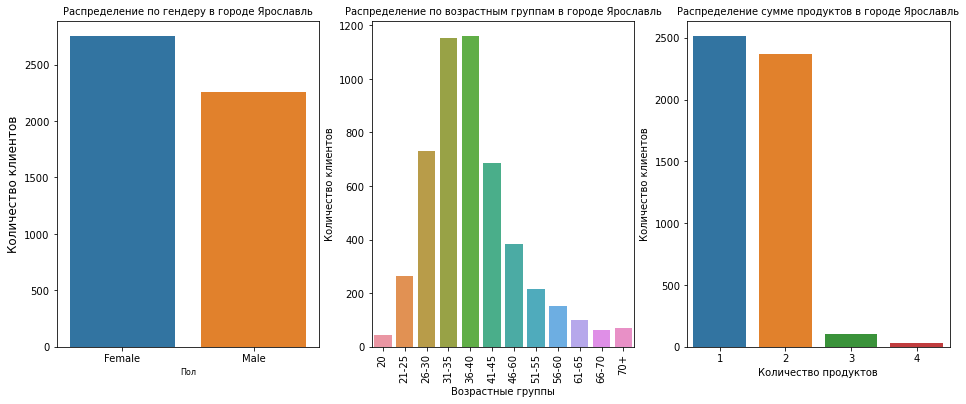

Город Рыбинск
__________________________________________________________________________________________________________________


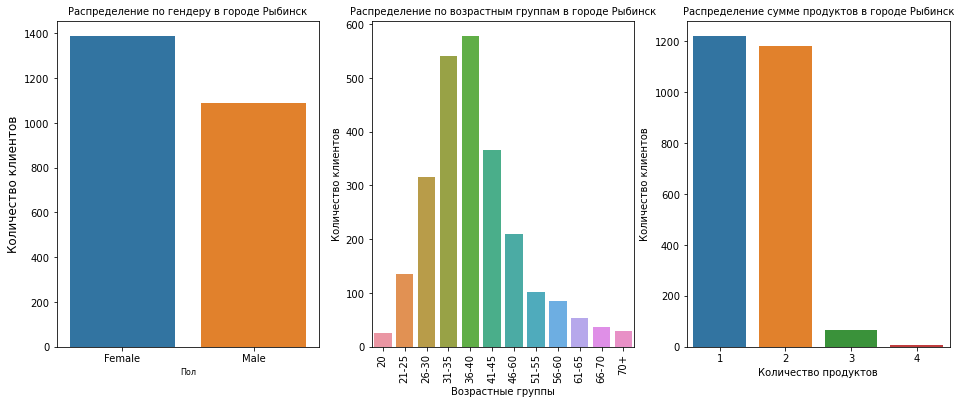

Город Ростов Великий
__________________________________________________________________________________________________________________


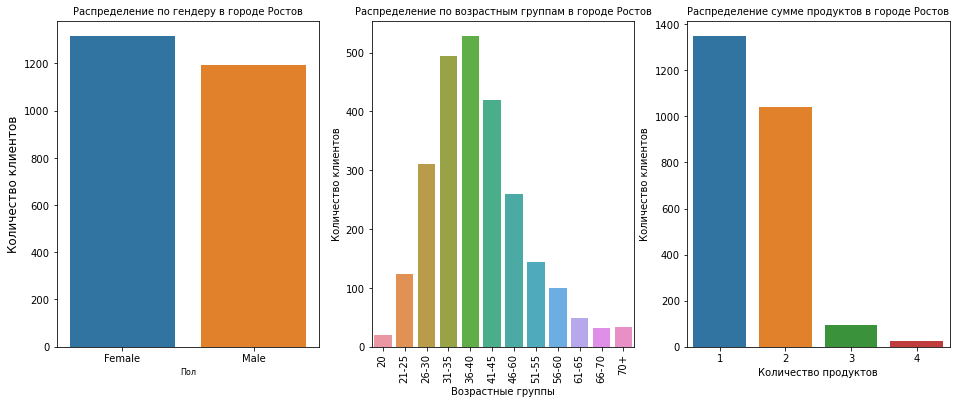

In [24]:
for town in df['city'].unique():
    my_sity_gender(df, town)

In [25]:
display(df.head(3))

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl,category_age,fin_age
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1,6,41-45
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,6,41-45
2,15662040,502,Ярославль,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,6,41-45


In [26]:
def scor_balance_salary(data, town):
    temp_all = data.query('city == @town')
 
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    print(f'Город {town}')
    print('__________________________________________________________________________________________________________________')
    
    sns.kdeplot(data=temp_all, x='score', color = 'red')
    plt.title(f'Баллы кредитного скоринга, {town.split()[0]}', size = 10)
    plt.ylabel('')
    plt.xlabel('', size = 12)
    
    plt.subplot(1, 3, 2)
    sns.kdeplot(data=temp_all, x='balance', color = 'red')
    
    plt.title(f'Баланс клиентов, {town.split()[0]}', size = 10)
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.xlabel('')
    
    plt.subplot(1, 3, 3)
    sns.histplot(data=temp_all, x='estimated_salary', color = 'green', bins = 50)
    
    plt.title(f'Зарпалата клиентов, {town.split()[0]}', size = 10)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.show()
    

Город Ярославль
__________________________________________________________________________________________________________________


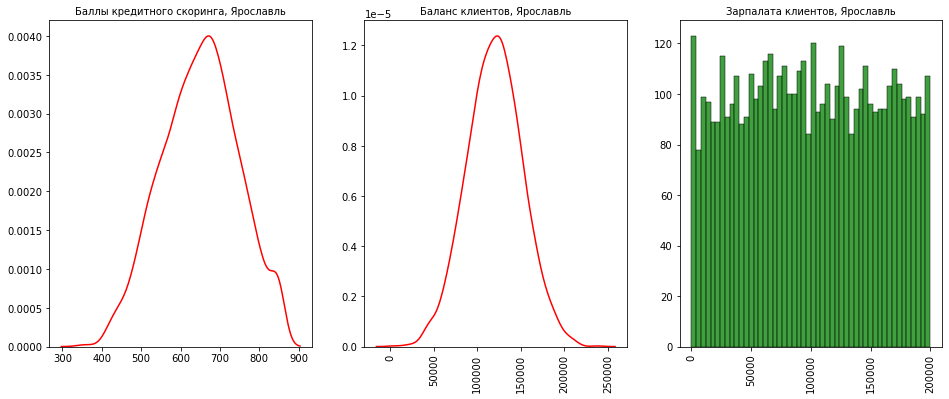

Город Рыбинск
__________________________________________________________________________________________________________________


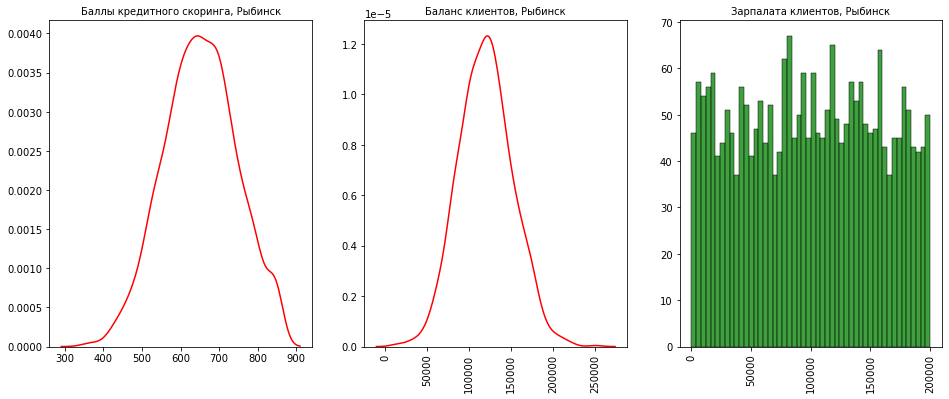

Город Ростов Великий
__________________________________________________________________________________________________________________


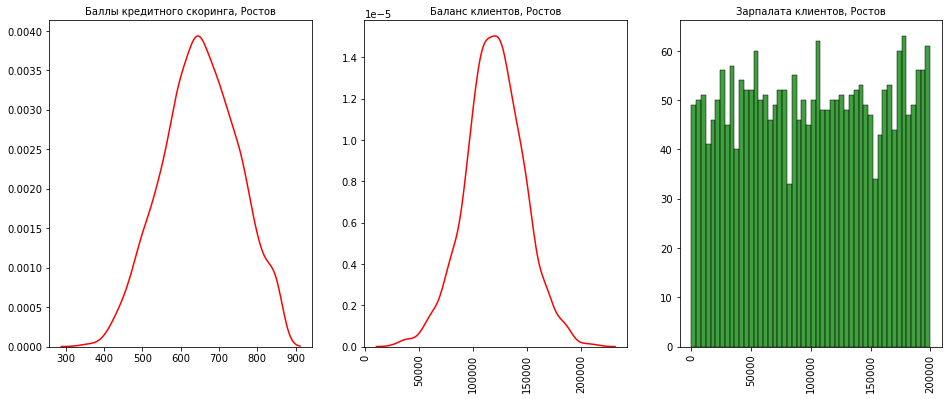

In [27]:
for town in df['city'].unique():
    scor_balance_salary(df, town)

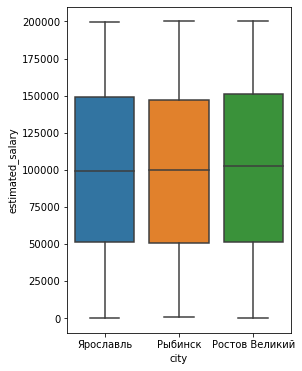

In [28]:
plt.figure(figsize=(4, 6))
sns.boxplot(y='estimated_salary', x='city', data=df)
plt.show()

In [29]:
df.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl,category_age,fin_age
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1,6,41-45
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,6,41-45


In [30]:
df_to_cor = df.drop(['rostov', 'rybinsk', 'yaroslavl','category_age','fin_age'], axis=1)
display(df_to_cor.head(3))

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0
2,15662040,502,Ярославль,1,42,8,159660.80,3,1,0,113931.57,1,1,0


In [31]:
df_to_cor.loc[df_to_cor['city']=='Ярославль','city'] = 1
df_to_cor.loc[df_to_cor['city']=='Рыбинск','city'] = 2
df_to_cor.loc[df_to_cor['city']=='Ростов Великий','city'] = 3
#меняем тип данных на int
df_to_cor['city'] = df_to_cor['city'].astype(int)

In [32]:
df_to_mix = df.copy()

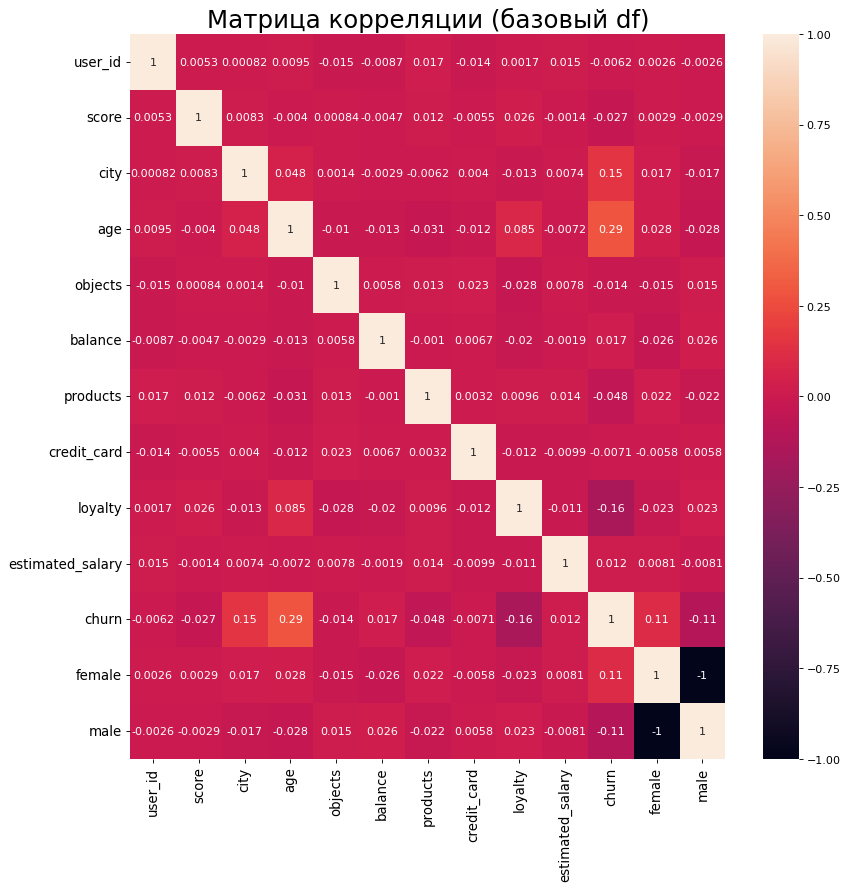

In [33]:
plt.figure(figsize=(12,12), dpi= 80)
matrix = df_to_cor.corr()
#sns.heatmap(matrix, xticklabels=matrix.columns, yticklabels=matrix.columns, center=0, annot=True)
sns.heatmap(matrix, annot=True)
# Decorations
plt.title('Матрица корреляции (базовый df)', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

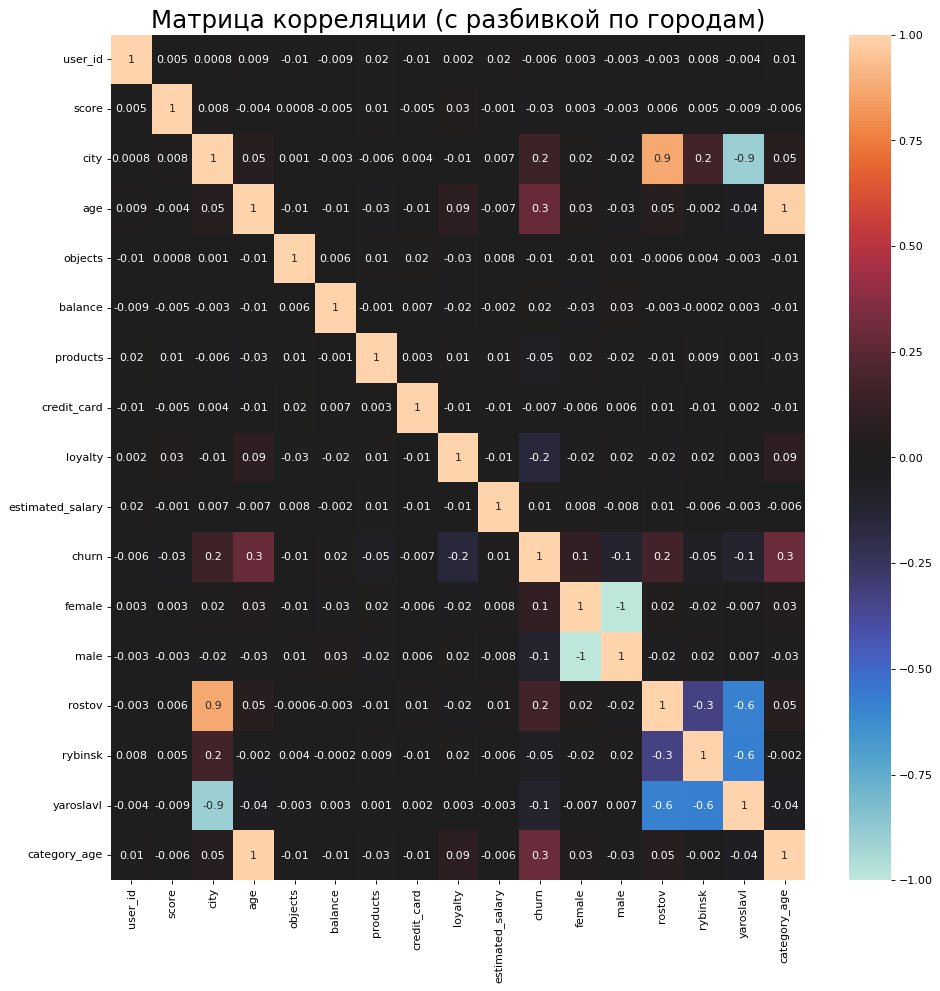

In [34]:
plt.figure(figsize=(14,14), dpi= 80)
df['city'] = df_to_cor['city']
matrix = df.corr()

sns.heatmap(matrix, annot=True, fmt='.0g', vmin=-1, vmax=1, center= 0)

plt.title('Матрица корреляции (с разбивкой по городам)', fontsize=22)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.show()

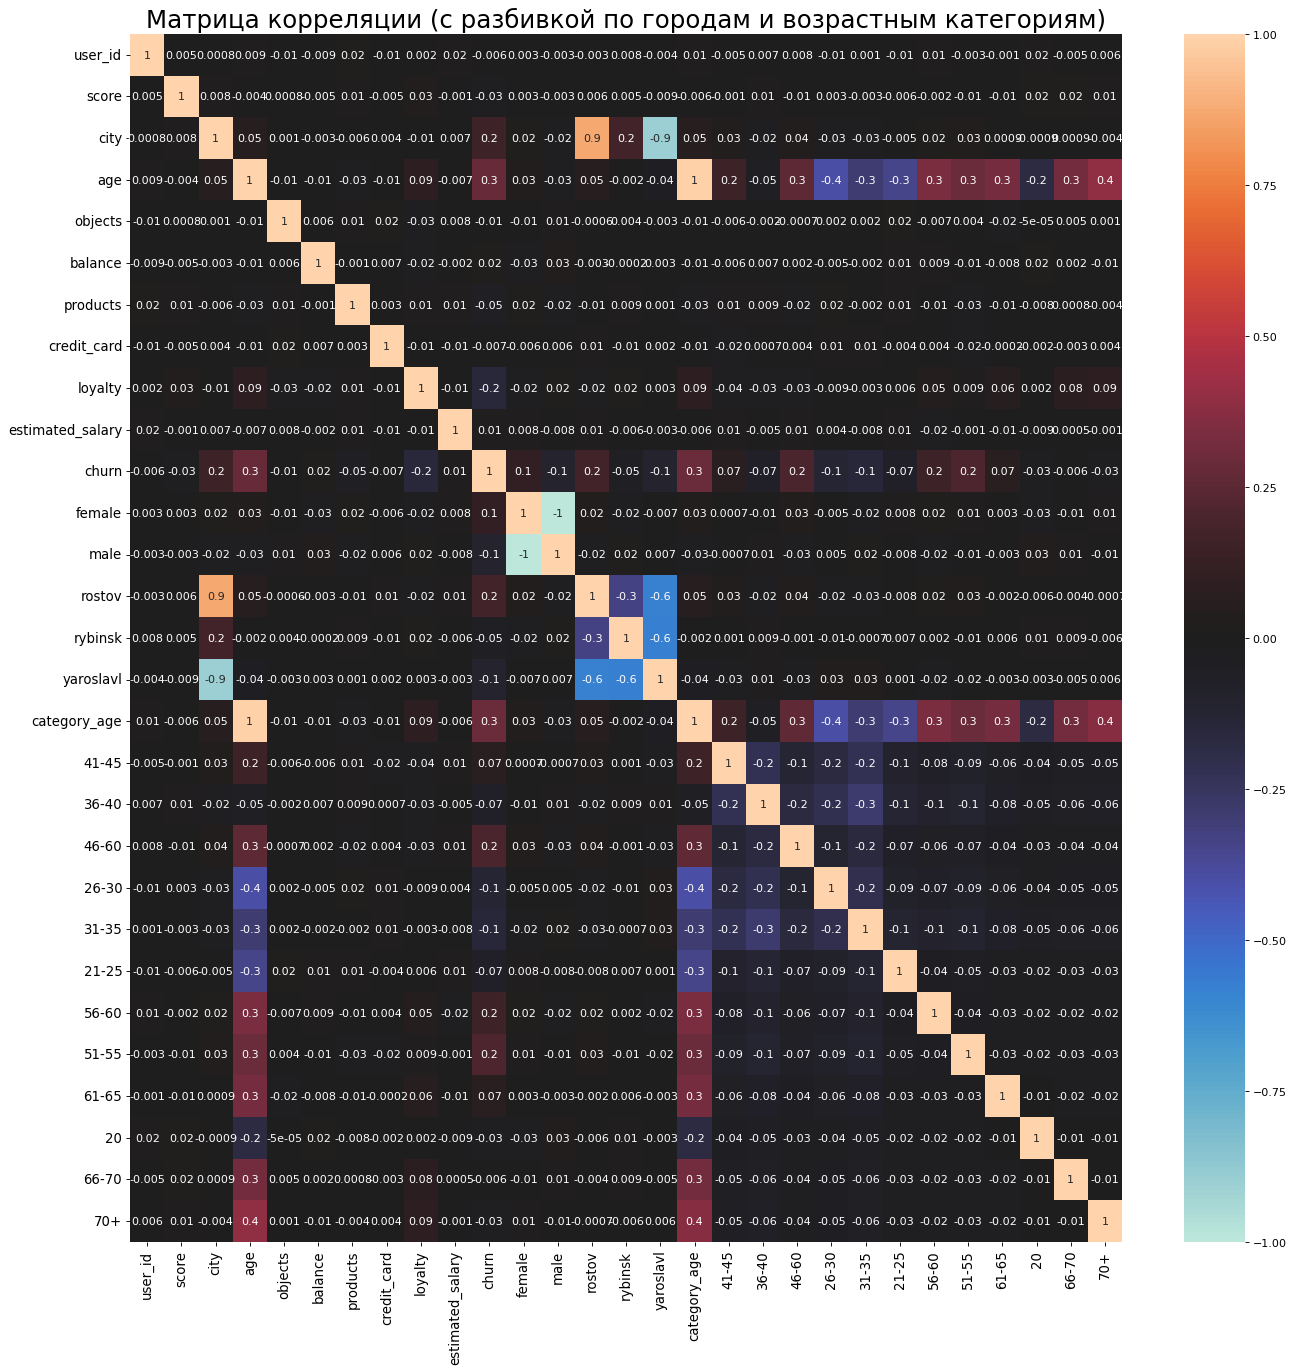

In [35]:
plt.figure(figsize=(20,20), dpi= 80)
df_age['city'] = df_to_cor['city']
matrix = df_age.corr()
#sns.heatmap(matrix, xticklabels=matrix.columns, yticklabels=matrix.columns, center=0, annot=True)
sns.heatmap(matrix, annot=True, fmt='.0g', vmin=-1, vmax=1, center= 0)
# Decorations
plt.title('Матрица корреляции (c разбивкой по городам и возрастным категориям)', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 4. Выделем портреты клиентов, которые склонны уходить из банка по признакам

In [36]:
df_to_cor.describe()

,user_id,score,city,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,1.749500,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300,0.545700
std,7.193619e+04,96.653299,0.830433,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.497932
min,1.560844e+07,350.000000,1.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,1.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,1.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,3.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,1.585843e+07,850.000000,3.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [37]:
temp = df_age.groupby(['churn'])[['20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-60', '51-55', '56-60','61-65','66-70', '70+']].mean()
#temp = df_age.groupby(['churn'])[['18', '18-20', '21-25', '56-60','61-65','66-70', '70+']].mean()
temp.head(2)

,20,21-25,26-30,31-35,36-40,41-45,46-60,51-55,56-60,61-65,66-70,70+
churn,,,,,,,,,,,,
0,0.010549,0.060404,0.157604,0.249403,0.241994,0.135125,0.057265,0.024112,0.019716,0.015070,0.013437,0.015321
1,0.002455,0.020128,0.050074,0.097693,0.166421,0.193422,0.193422,0.132057,0.087874,0.039273,0.011782,0.005400


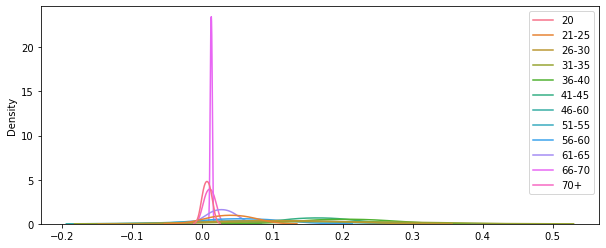

In [38]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=temp)
plt.show()

In [39]:
temp = df_age.groupby(['city','churn'])[['20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-60', '51-55', '56-60', '61-65', '66-70',
 '70+']].agg({'mean'}).T
temp

city               1                   2                   3          
churn              0         1         0         1         0         1
20    mean  0.009990  0.001235  0.012112  0.002421  0.010029  0.003686
21-25 mean  0.058991  0.018519  0.059593  0.031477  0.064897  0.015971
26-30 mean  0.165794  0.043210  0.139535  0.065375  0.159292  0.049140
31-35 mean  0.256185  0.091358  0.239341  0.111380  0.244838  0.097052
36-40 mean  0.241199  0.180247  0.251938  0.140436  0.231858  0.165848
41-45 mean  0.127260  0.185185  0.137597  0.198547  0.151622  0.199017
46-60 mean  0.055186  0.185185  0.064922  0.181598  0.053097  0.207617
51-55 mean  0.023787  0.141975  0.023740  0.128329  0.025369  0.124079
56-60 mean  0.017602  0.096296  0.025194  0.079903  0.018289  0.083538
61-65 mean  0.015224  0.041975  0.016957  0.043584  0.012389  0.034398
66-70 mean  0.013083  0.009877  0.015988  0.009685  0.011209  0.014742
70+   mean  0.015699  0.004938  0.013081  0.007264  0.017109  0.004914

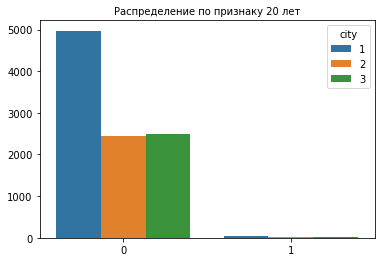

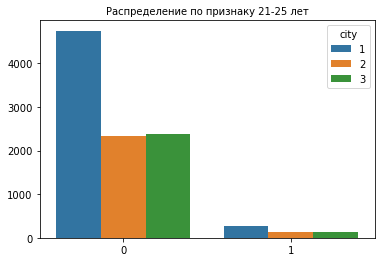

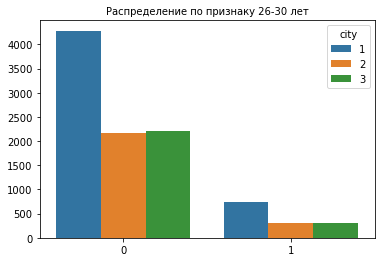

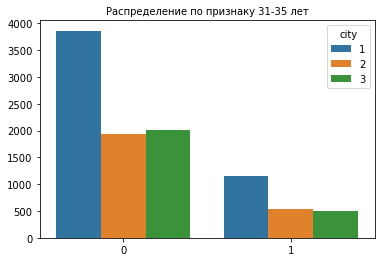

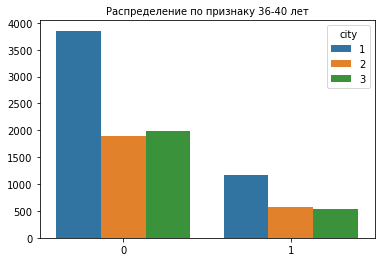

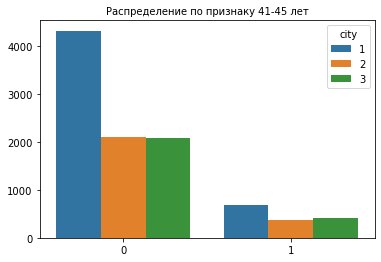

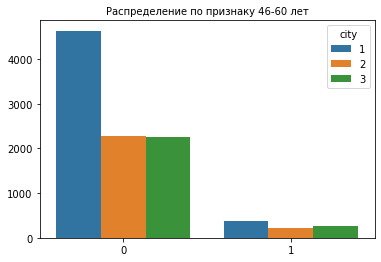

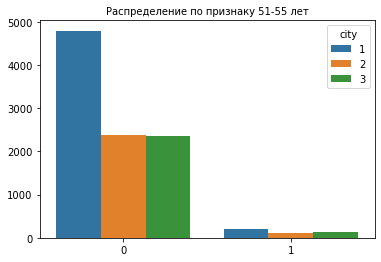

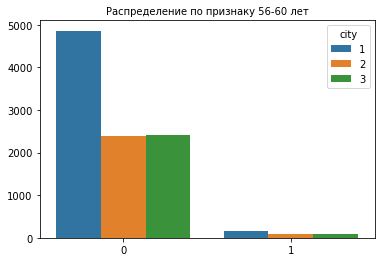

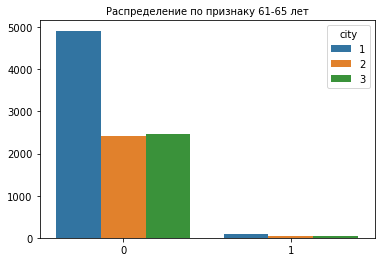

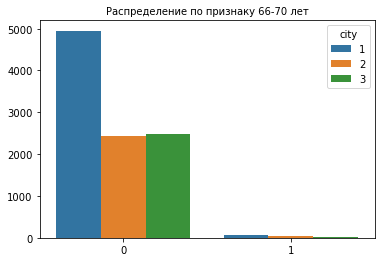

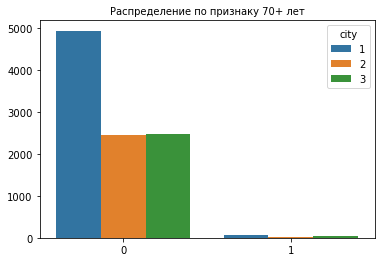

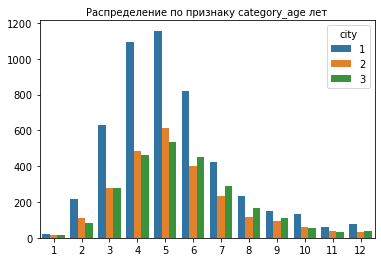

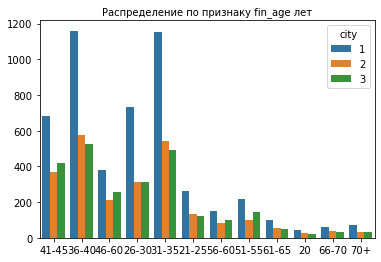

In [40]:
for column in sorted(df_age.columns[17:]):     
#    sns.kdeplot(data=df_age, x=column,hue='city')
    sns.countplot(data=df_age, x=column,hue='city')
    plt.title(f'Распределение по признаку {column} лет', fontsize = 10, color = 'black')
    plt.ylabel('')
    plt.xlabel('')
    plt.show()
    
   

In [41]:
df_age.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,...,46-60,26-30,31-35,21-25,56-60,51-55,61-65,20,66-70,70+
0,15677338,619,1,1,42,2,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,15690047,608,2,1,41,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,0,0


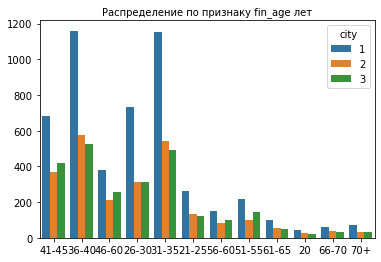

In [42]:
sns.countplot(data=df_age, x=column,hue='city')
plt.title(f'Распределение по признаку {column} лет', fontsize = 10, color = 'black')
plt.ylabel('')
plt.xlabel('')
plt.show()

Распределение признаков в разрезе количества используемых продуктов 

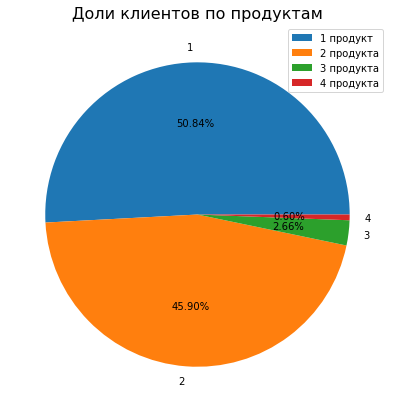

In [43]:
number_products = df.groupby('products')['products'].count().to_frame().rename(columns={'products':'products_cnt'})
number_products.plot(kind = 'pie', y ='products_cnt', autopct='%.2f%%', figsize= (7,7))
plt.title('Доли клиентов по продуктам', fontsize = 16)
plt.legend(['1 продукт','2 продукта','3 продукта','4 продукта'])
plt.ylabel('')
plt.show()

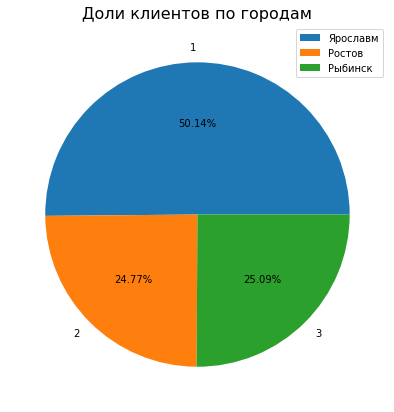

In [44]:
number_products = df.groupby('city')['products'].count().to_frame().rename(columns={'products':'products_cnt'})
number_products.plot(kind = 'pie', y ='products_cnt', autopct='%.2f%%', figsize= (7,7))
plt.title('Доли клиентов по городам', fontsize = 16)
plt.legend(['Ярославм','Ростов','Рыбинск'])
plt.ylabel('')
plt.xlabel('')
plt.show()

In [45]:
temp = df.groupby(['products', 'churn'])['loyalty'].agg(['count']).T
#temp = temp.reset_index()
#temp = temp.rename(columns={1:'Ярославль',2:'Рыбинск', 3:'Ростов' })
#df.groupby('products','churn')['score', 'city', 'gender', 'age', 'objects', 'balance',
#      'products', 'credit_card', 'loyalty', 'estimated_salary'].agg({'churn':'sum','products':'count'}).agg(
#       ['sum', 'count']).T
print("1:'Ярославль',2:'Рыбинск', 3:'Ростов'")
temp  

1:'Ярославль',2:'Рыбинск', 3:'Ростов'


products     1           2        3        4
churn        0     1     0    1   0    1   1
count     3675  1409  4242  348  46  220  60

In [46]:
df.query('products == 4').groupby('churn').agg({'products':'count'})


,products
churn,
1,60


In [47]:
df.query('products == 3').groupby('churn').agg({'products':'count'})

,products
churn,
0,46
1,220


In [48]:
df.query('products == 2').groupby('churn').agg({'products':'count'})

,products
churn,
0,4242
1,348


In [49]:
df.query('products == 1').groupby('churn').agg({'products':'count'})

,products
churn,
0,3675
1,1409


In [50]:
temp = df.groupby(['products', 'churn'])[['score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary','fin_age']].agg(
       ['mean', 'median']).T
#temp = temp.rename(columns = {1:'1 продукт',2:'2 продукт',3:'3 продукта',4:'4 продукта'})

C:\Users\MaCSC LLC\AppData\Local\Temp\ipykernel_11416\22371610.py:1: FutureWarning: ['fin_age'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = df.groupby(['products', 'churn'])[['score', 'city', 'gender', 'age', 'objects', 'balance',


In [51]:
def my_fun_fanny(data, sity=None):
    print (f'Распределение по городу {sity}')
    print ('_______________________________________________________________________________________________________________')
    data = data.query('city == @sity')
    priznaki = [['gender','objects','products'],['credit_card','loyalty','churn']]

    for priznak in priznaki:
        
        plt.figure(figsize=(14,5))   
        plt.subplot(1, 3, 1)
        ax = sns.countplot(data=data, x=priznak[0]);
        plt.title(f'Распределение по {priznak[0]}', fontsize = 10, color = 'black')
        plt.ylabel('')
        plt.xlabel('')
    
        plt.subplot(1, 3, 2)
        ax = sns.countplot(data=data, x=priznak[1]);
        plt.title(f'Распределение по {priznak[1]}', fontsize = 10, color = 'black')        
        plt.ylabel('')
        plt.xlabel('')
    
        plt.subplot(1, 3, 3)
        ax = sns.countplot(data=data, x=priznak[2]);
        plt.title(f'Распределение по {priznak[2]}', fontsize = 10, color = 'black')     
        plt.ylabel('')
        plt.xlabel('')
    
        plt.show()
        

In [52]:
#df.head(2)

In [53]:
#ax = sns.countplot(data=df, x='city');
#plt.title(f'Признак {priznak}. Распределение по {column[0]}', fontsize = 16, color = 'black')
#plt.show()


Распределение по городу 1
_______________________________________________________________________________________________________________


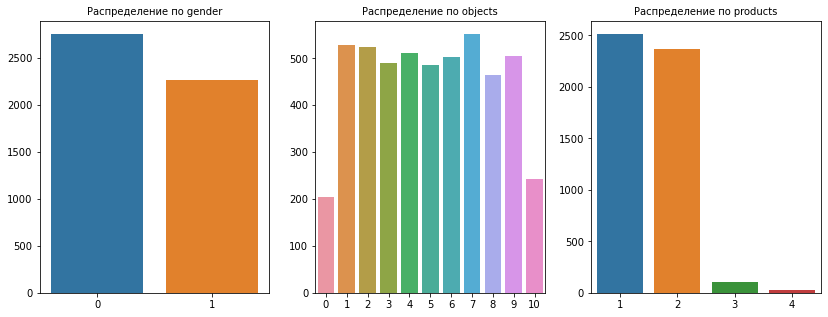

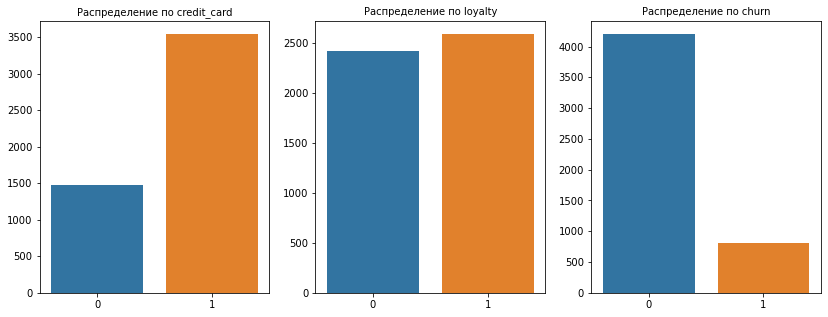

Распределение по городу 2
_______________________________________________________________________________________________________________


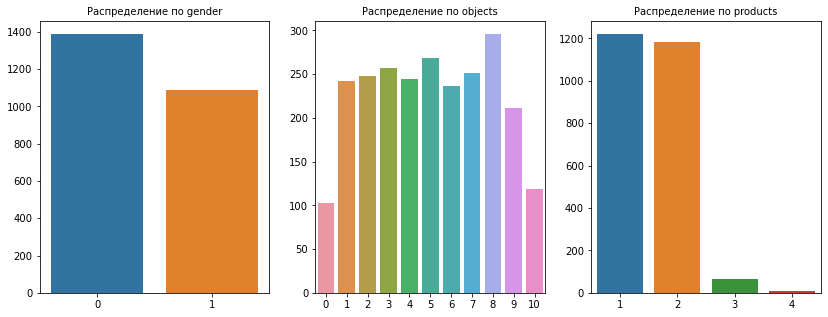

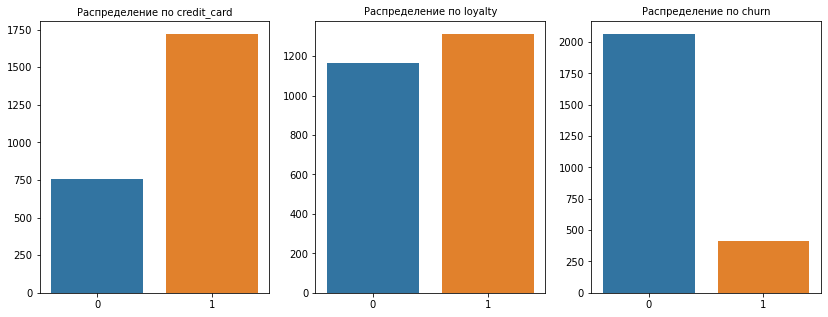

Распределение по городу 3
_______________________________________________________________________________________________________________


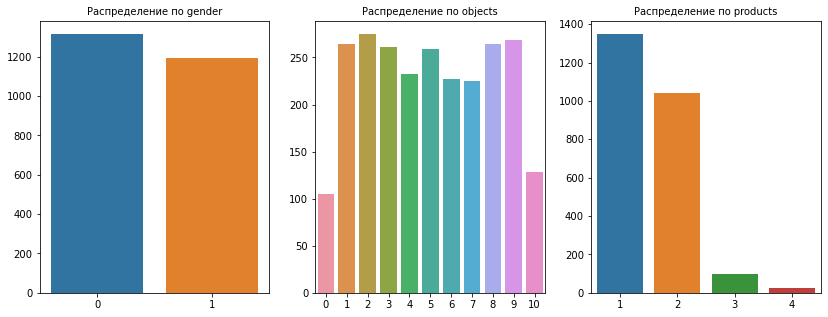

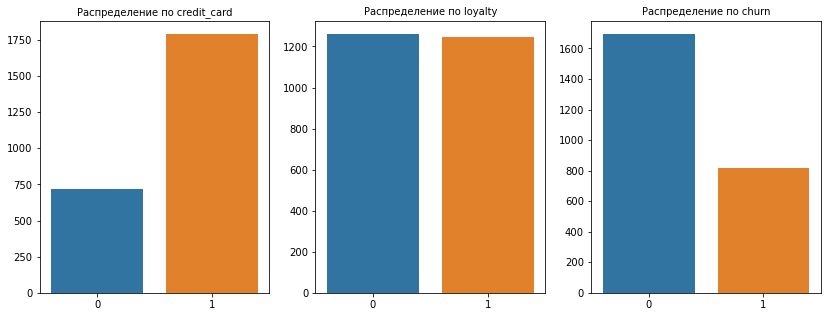

In [54]:
for sity_in_for in df['city'].unique():
    my_fun_fanny(df, sity=sity_in_for)



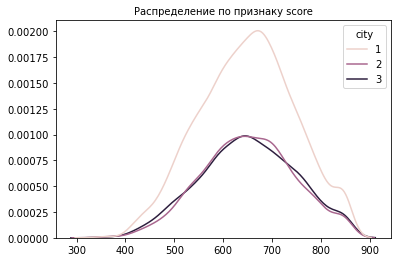

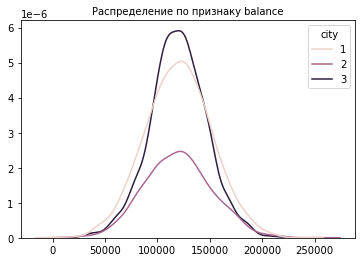

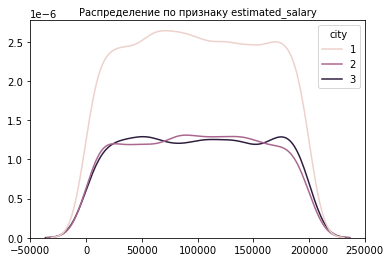

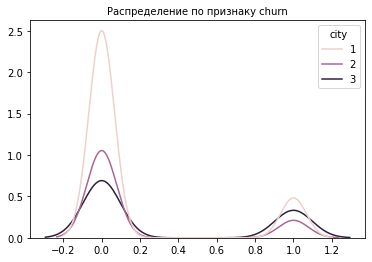

In [55]:
for column in ['score',  'balance', 'estimated_salary','churn']:        
    sns.kdeplot(data=df, x=column,hue='city')
    plt.title(f'Распределение по признаку {column}', fontsize = 10, color = 'black')
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

In [56]:
df.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl,category_age,fin_age
0,15677338,619,1,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1,6,41-45
1,15690047,608,2,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,6,41-45


Распределение по городам


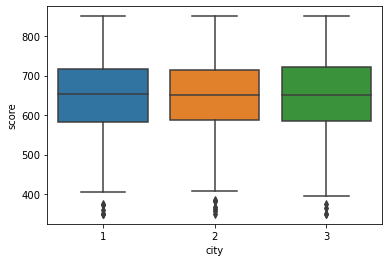

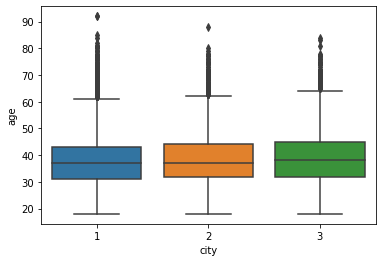

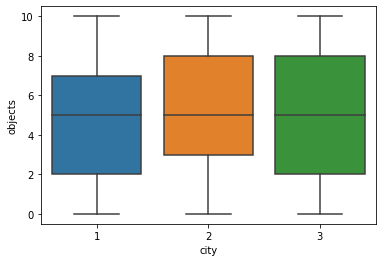

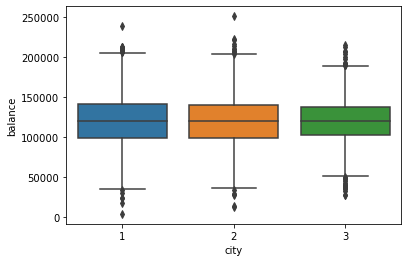

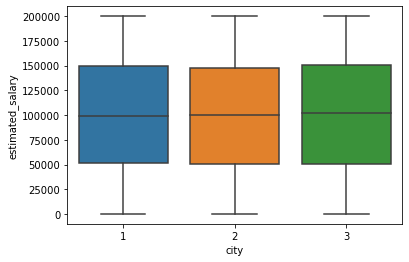

In [57]:
print('Распределение по городам')
for column in ['score', 'age', 'objects',  'balance', 'estimated_salary']:
    sns.boxplot(x = 'city', y = df[column], data = df)
    plt.show()

# Сделаем выбоки:

In [58]:
temp = df.query("fin_age == '61-65' or fin_age == '66-70' or fin_age == '70+'").groupby('churn')['user_id'].count()
temp1 = df.groupby('churn')['user_id'].count()
print('По возрастному признаку: моложе 20 и старше 61 года')
print(f'Отточных {temp.loc[0]}, активныех {temp.loc[1]}, процент ушедших:{temp.loc[1]/(temp.loc[0]+temp.loc[1])*100:.2f}%')
print('')
print('По возрастному признаку без выделения возраста')
print(f'Отточных {temp1.loc[0]}, активныех {temp1.loc[1]}, процент ушедших:{temp1.loc[1]/(temp1.loc[0]+temp1.loc[1])*100:.2f}%')

По возрастному признаку: моложе 20 и старше 61 года
Отточных 349, активныех 115, процент ушедших:24.78%

По возрастному признаку без выделения возраста
Отточных 7963, активныех 2037, процент ушедших:20.37%


Выборка по рейтингу клиентов

In [59]:
temp = df.query("score <= 450").groupby('churn')['user_id'].count()
temp1 = df.groupby('churn')['user_id'].count()
print('По рейтингу 450:')
print(f'Отточных {temp.loc[0]}, активныех {temp.loc[1]}, процент ушедших:{temp.loc[1]/(temp.loc[0]+temp.loc[1])*100:.2f}%')
print('')
print('По рейтингу')
print(f'Отточных {temp1.loc[0]}, активныех {temp1.loc[1]}, процент ушедших:{temp1.loc[1]/(temp1.loc[0]+temp1.loc[1])*100:.2f}%')

По рейтингу 450:
Отточных 128, активныех 61, процент ушедших:32.28%

По рейтингу
Отточных 7963, активныех 2037, процент ушедших:20.37%


Text(0.5, 0, '')

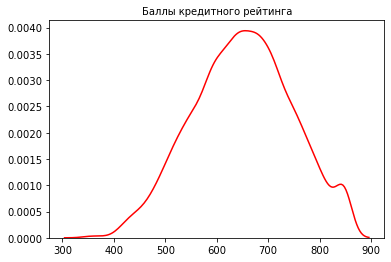

In [60]:
sns.kdeplot(data=df, x='score', color = 'red')
plt.title(f'Баллы кредитного рейтинга', size = 10)
plt.ylabel('')
plt.xlabel('', size = 12)

In [61]:
temp1 = df.query("products == 1").groupby('churn')['user_id'].count()
temp2 = df.query("products == 2").groupby('churn')['user_id'].count()
temp3 = df.query("products == 3").groupby('churn')['user_id'].count()
temp4 = df.query("products == 4").groupby('churn')['user_id'].count()
temp = df.groupby('churn')['user_id'].count()

print('Отточные клиенты')
print(f'C кол-вом продуктов 1 всего:{temp1.loc[0]}, активныех {temp1.loc[1]}, процент ушедших:{temp1.loc[1]/(temp1.loc[0]+temp1.loc[1])*100:.2f}%')
print(f'C кол-вом продуктов 2 всего:{temp2.loc[0]}, активныех {temp2.loc[1]}, процент ушедших:{temp2.loc[1]/(temp2.loc[0]+temp2.loc[1])*100:.2f}%')
print(f'C кол-вом продуктов 3 всего:{temp3.loc[0]}, активныех {temp3.loc[1]}, процент ушедших:{temp3.loc[1]/(temp3.loc[0]+temp3.loc[1])*100:.2f}%')
try:
    print(f'C кол-вом продуктов 4 всего:{temp4.loc[0]}, активныех {temp4.loc[1]}, процент ушедших:{temp4.loc[1]/(temp4.loc[0]+temp4.loc[1])*100:.2f}%')
except KeyError:
    print(f'C кол-вом продуктов 4 всего:{temp4[1]}, активныех 0, процент ушедших:{100:.2f}%')
print('')

print(f'Отточных {temp.loc[0]}, активныех {temp.loc[1]}, процент ушедших:{temp.loc[1]/(temp.loc[0]+temp.loc[1])*100:.2f}%')

Отточные клиенты
C кол-вом продуктов 1 всего:3675, активныех 1409, процент ушедших:27.71%
C кол-вом продуктов 2 всего:4242, активныех 348, процент ушедших:7.58%
C кол-вом продуктов 3 всего:46, активныех 220, процент ушедших:82.71%
C кол-вом продуктов 4 всего:60, активныех 0, процент ушедших:100.00%

Отточных 7963, активныех 2037, процент ушедших:20.37%


In [62]:
temp = df.groupby('products').agg({'user_id':'count'})
temp1 = df.query('churn == 1').groupby('products').agg({'user_id':'count'})
temp['churn_1'] = temp1['user_id']
temp['churn_0'] = temp['user_id'] - temp['churn_1']
temp['churn_%'] = round((temp['churn_1']/temp['user_id']),2)
temp = temp.reset_index()
print(temp)

   products  user_id  churn_1  churn_0  churn_%
0         1     5084     1409     3675     0.28
1         2     4590      348     4242     0.08
2         3      266      220       46     0.83
3         4       60       60        0     1.00


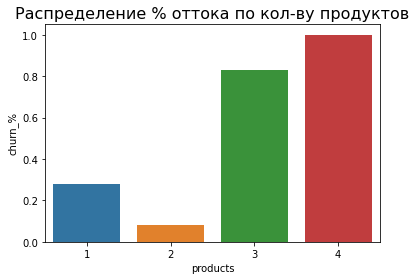

In [63]:
sns.barplot(y='churn_%', x='products', data = temp)
plt.title('Распределение % оттока по кол-ву продуктов', fontsize = 16, color = 'black')
plt.show()

# Продолжаем выборки. 


In [64]:
df_to_mix.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,female,male,rostov,rybinsk,yaroslavl,category_age,fin_age
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1,6,41-45
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,6,41-45


In [65]:
temp = df_to_mix.query('city == "Ростов Великий" and gender == 1')
temp = temp.sort_values(by = 'fin_age' )


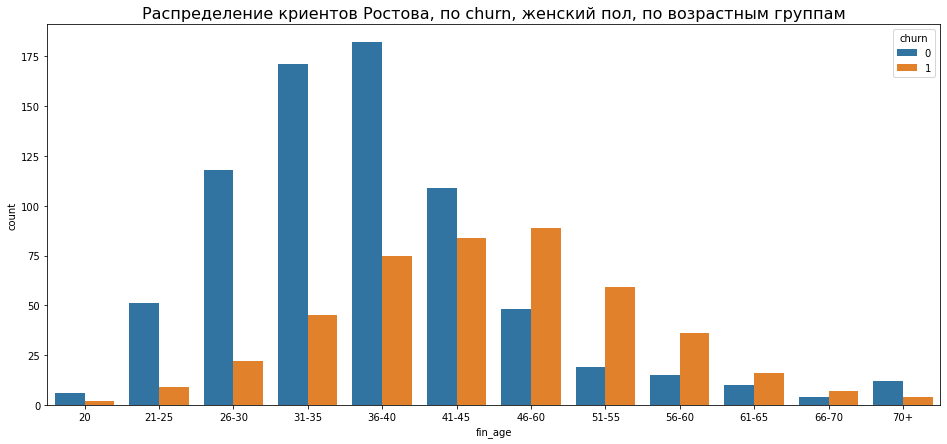

In [66]:
plt.figure(figsize=(16,7))
sns.countplot(data=temp, x='fin_age', hue='churn')
plt.title('Распределение криентов Ростова, по churn, женский пол, по возрастным группам', fontsize = 16, color = 'black')
plt.show()

In [67]:
temp = df_to_mix.query('city == "Ростов Великий" and gender == 0')
temp = temp.sort_values(by = 'fin_age' )

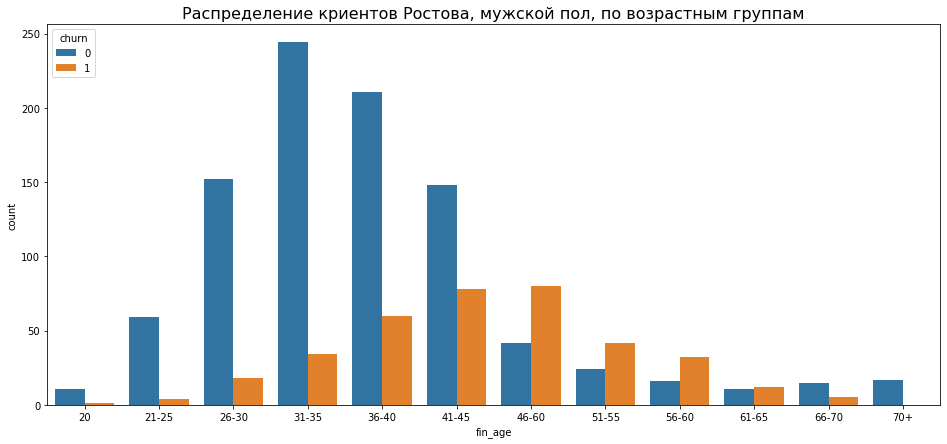

In [68]:
plt.figure(figsize=(16,7))
sns.countplot(data=temp, x='fin_age', hue='churn')
plt.title('Распределение криентов Ростова, мужской пол, по возрастным группам', fontsize = 16, color = 'black')
plt.show()

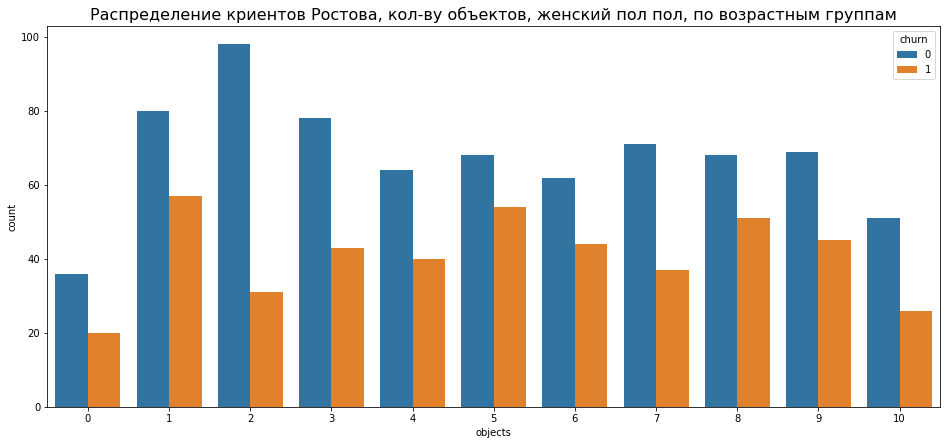

In [69]:
temp = df_to_mix.query('city == "Ростов Великий" and gender == 1')
temp = temp.sort_values(by = 'fin_age' )
plt.figure(figsize=(16,7))
sns.countplot(data=temp, x='objects', hue='churn')
plt.title('Распределение криентов Ростова, кол-ву объектов, женский пол пол, по возрастным группам', fontsize = 16, color = 'black')
plt.show()

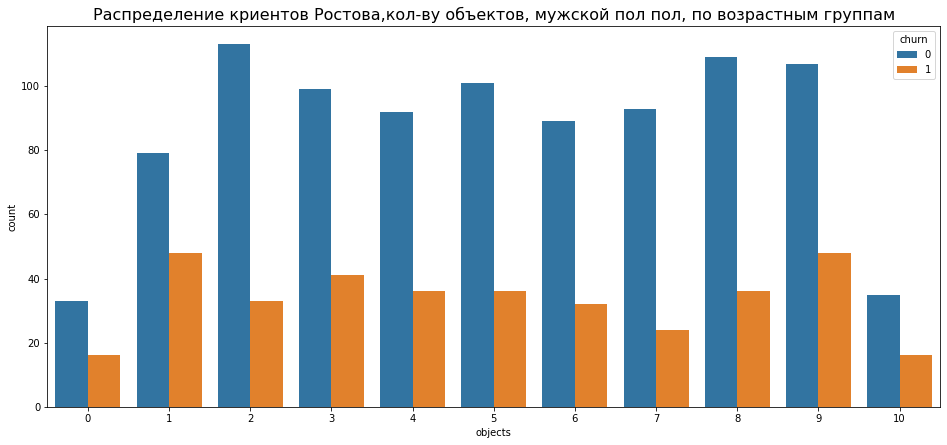

In [70]:
temp = df_to_mix.query('city == "Ростов Великий" and gender == 0')
temp = temp.sort_values(by = 'fin_age' )
plt.figure(figsize=(16,7))
sns.countplot(data=temp, x='objects', hue='churn')
plt.title('Распределение криентов Ростова,кол-ву объектов, мужской пол пол, по возрастным группам', fontsize = 16, color = 'black')
plt.show()

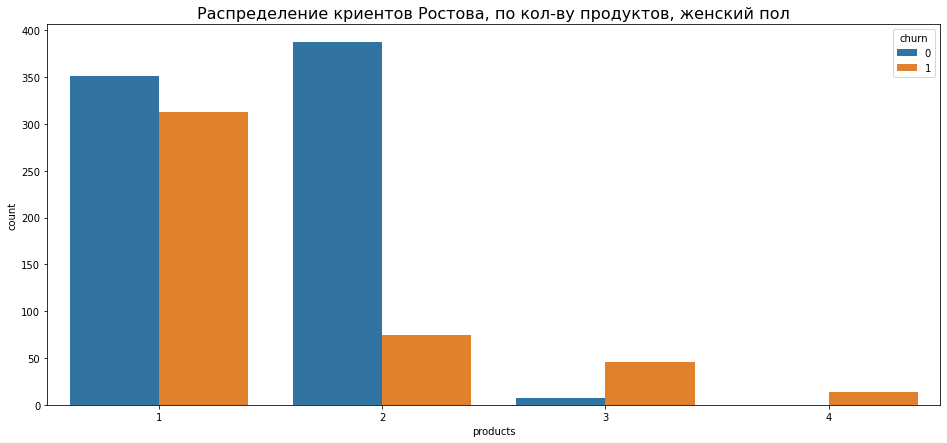

In [71]:
temp = df_to_mix.query('city == "Ростов Великий" and gender == 1')
temp = temp.sort_values(by = 'fin_age' )
plt.figure(figsize=(16,7))
sns.countplot(data=temp, x='products', hue='churn')
plt.title('Распределение криентов Ростова, по кол-ву продуктов, женский пол', fontsize = 16, color = 'black')
plt.show()

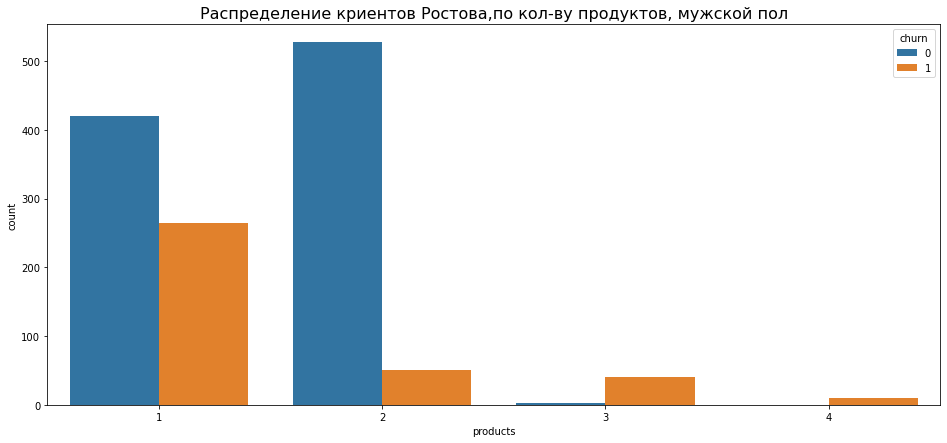

In [72]:
temp = df_to_mix.query('city == "Ростов Великий" and gender == 0')
temp = temp.sort_values(by = 'fin_age' )
plt.figure(figsize=(16,7))
sns.countplot(data=temp, x='products', hue='churn')
plt.title('Распределение криентов Ростова,по кол-ву продуктов, мужской пол', fontsize = 16, color = 'black')
plt.show()

In [73]:
temp_new = df_to_mix.query('score<=600 and age<=20 or age>=61 and products>=3')
print(len(temp_new))

38


In [74]:
temp_new = temp_new.groupby('churn')['user_id'].count()
temp_old = df_to_mix.groupby('churn')['user_id'].count()

In [75]:
print('''
Возраст до 20 или старше 61 года
Используют 3-4 продукта банка
Рейтинг ниже 600:''')
print('')
print(f'Отточных {temp_new.loc[0]}, активныех {temp_new.loc[1]}, процент ушедших:{temp_new.loc[1]/(temp_new.loc[0]+temp_new.loc[1])*100:.2f}%')

print('Статистика по всем данным')
print(f'Отточных {temp_old.loc[0]}, активныех {temp_old.loc[1]}, процент ушедших:{temp_old.loc[1]/(temp_old.loc[0]+temp_old.loc[1])*100:.2f}%')


Возраст до 20 или старше 61 года
Используют 3-4 продукта банка
Рейтинг ниже 600:

Отточных 22, активныех 16, процент ушедших:42.11%
Статистика по всем данным
Отточных 7963, активныех 2037, процент ушедших:20.37%


# 5. Проверка статистических гипотез

In [76]:
gip_1_male = df.query('gender == 1')['estimated_salary']
gip_1_female = df.query('gender == 0')['estimated_salary']

In [77]:
print(f'Мужчин: {len(gip_1_male):.0f} Женщин: {len(gip_1_female):.0f}')
print(f'Разница в размерах выборок: {(len(gip_1_male)/len(gip_1_female)-1)*100:.1f}%')

Мужчин: 4543 Женщин: 5457
Разница в размерах выборок: -16.7%


In [78]:
print(f'Уровень статистической значимости: t-test {st.ttest_ind(gip_1_male, gip_1_female)[1]}')

Уровень статистической значимости: t-test 0.4172819312945406


In [79]:
gip_2_goods = df.query('products in [1, 2]')['estimated_salary']
gip_4_goods = df.query('products in [3,4]')['estimated_salary']

In [80]:
print(f'Выборка 1: {len(gip_2_goods):.0f} Выборка 2: {len(gip_4_goods):.0f}')
print(f'Разница в размерах выборок: {(len(gip_2_goods)/len(gip_4_goods)-1)*100:.1f}%')
print(f'Различие средних значений выборок: {gip_2_goods.mean()/gip_4_goods.mean()}')

Выборка 1: 9674 Выборка 2: 326
Разница в размерах выборок: 2867.5%
Различие средних значений выборок: 0.9573263111093714


In [81]:
print(f'Уровень статистической значимости: t-test {st.ttest_ind(gip_2_goods, gip_4_goods)[1]}')

Уровень статистической значимости: t-test 0.1689240843478446


In [82]:
gip_3_H0 = df.query('city == 2')['estimated_salary']
gip_3_H1 = df.query('city == 3')['estimated_salary']

In [83]:
print(f'Выборка 1: {len(gip_3_H0):.0f} Выборка 2: {len(gip_3_H1):.0f}')
print(f'Разница в размерах выборок: {(len(gip_3_H0)/len(gip_3_H1)-1)*100:.1f}%')
print(f'Различие средних значений выборок: {gip_3_H0.mean()/gip_3_H1.mean()}')

Выборка 1: 2477 Выборка 2: 2509
Разница в размерах выборок: -1.3%
Различие средних значений выборок: 0.9834555831382076


In [84]:
print(f'Уровень статистической значимости: t-test {st.ttest_ind(gip_2_goods, gip_4_goods)[1]}')

Уровень статистической значимости: t-test 0.1689240843478446


# 6. Результаты исследования

Портрет клиента, имеющего тенденцию уходить:
1. Возраст до 20 или старше 61 года
2. Клиенты с рейтингом ниже 400 по все возрастны группа и категорям
3. Клиенты, пользующиеся 4 продуктами, а клиенты  использующие 3 продукта в зоне риска

